In [212]:
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing

In [213]:
df = pd.read_csv('Dataset.txt')   # Dataset
at_types = pd.read_csv('Attack_types.txt')

In [214]:
at_types.head()

,attack_category attack_type
0,apache2 dos
1,back dos
2,mailbomb dos
3,processtable dos
4,snmpgetattack dos


In [215]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [216]:
at_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   attack_category attack_type  41 non-null     object
dtypes: object(1)
memory usage: 460.0+ bytes


In [217]:
#To get the size of the dataset
num_rows, num_cols = df.shape

print(f'The dataset contains {num_rows} rows and {num_cols} columns.')

The dataset contains 125973 rows and 43 columns.


In [218]:
# count the number of 0 values in each column
zero_values_count = (df == 0).sum()

# print((zero_values_count/125973)*100)


# df.head()
# count the number of 0 values in each column
zero_values_count = (df == 0).sum()

print((zero_values_count/125973)*100)

duration                        92.047502
protocol_type                    0.000000
service                          0.000000
flag                             0.000000
src_bytes                       39.208402
dst_bytes                       53.953625
land                            99.980154
wrong_fragment                  99.134735
urgent                          99.992856
hot                             97.879704
num_failed_logins               99.903154
logged_in                       60.426441
num_compromised                 98.979146
root_shell                      99.865844
su_attempted                    99.936494
num_root                        99.484810
num_file_creations              99.772173
num_shells                      99.962690
num_access_files                99.705492
num_outbound_cmds              100.000000
is_host_login                   99.999206
is_guest_login                  99.057735
count                            0.010320
srv_count                        0

In [219]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance'],
      dtype='object')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [221]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [222]:
df.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [223]:
# Unique Attacks
print(df['attack_category'].unique())


['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [224]:
df['attack_category'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_category, dtype: int64

In [225]:
df['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [226]:
df.describe(include='object')

,protocol_type,service,flag,attack_category
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


<AxesSubplot: xlabel='protocol_type', ylabel='count'>

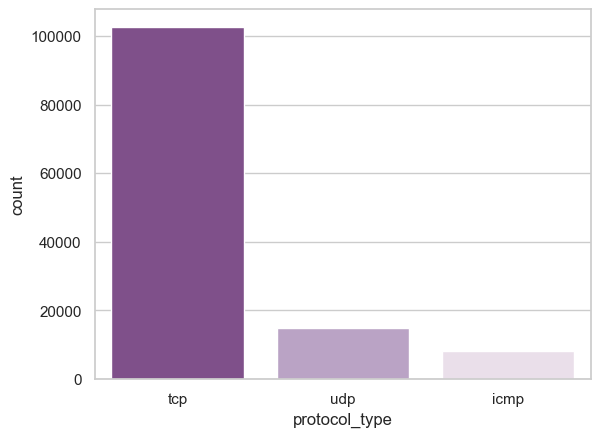

In [227]:
sns.set(style='whitegrid', palette='PRGn')
sns.countplot(data=df, x='protocol_type')

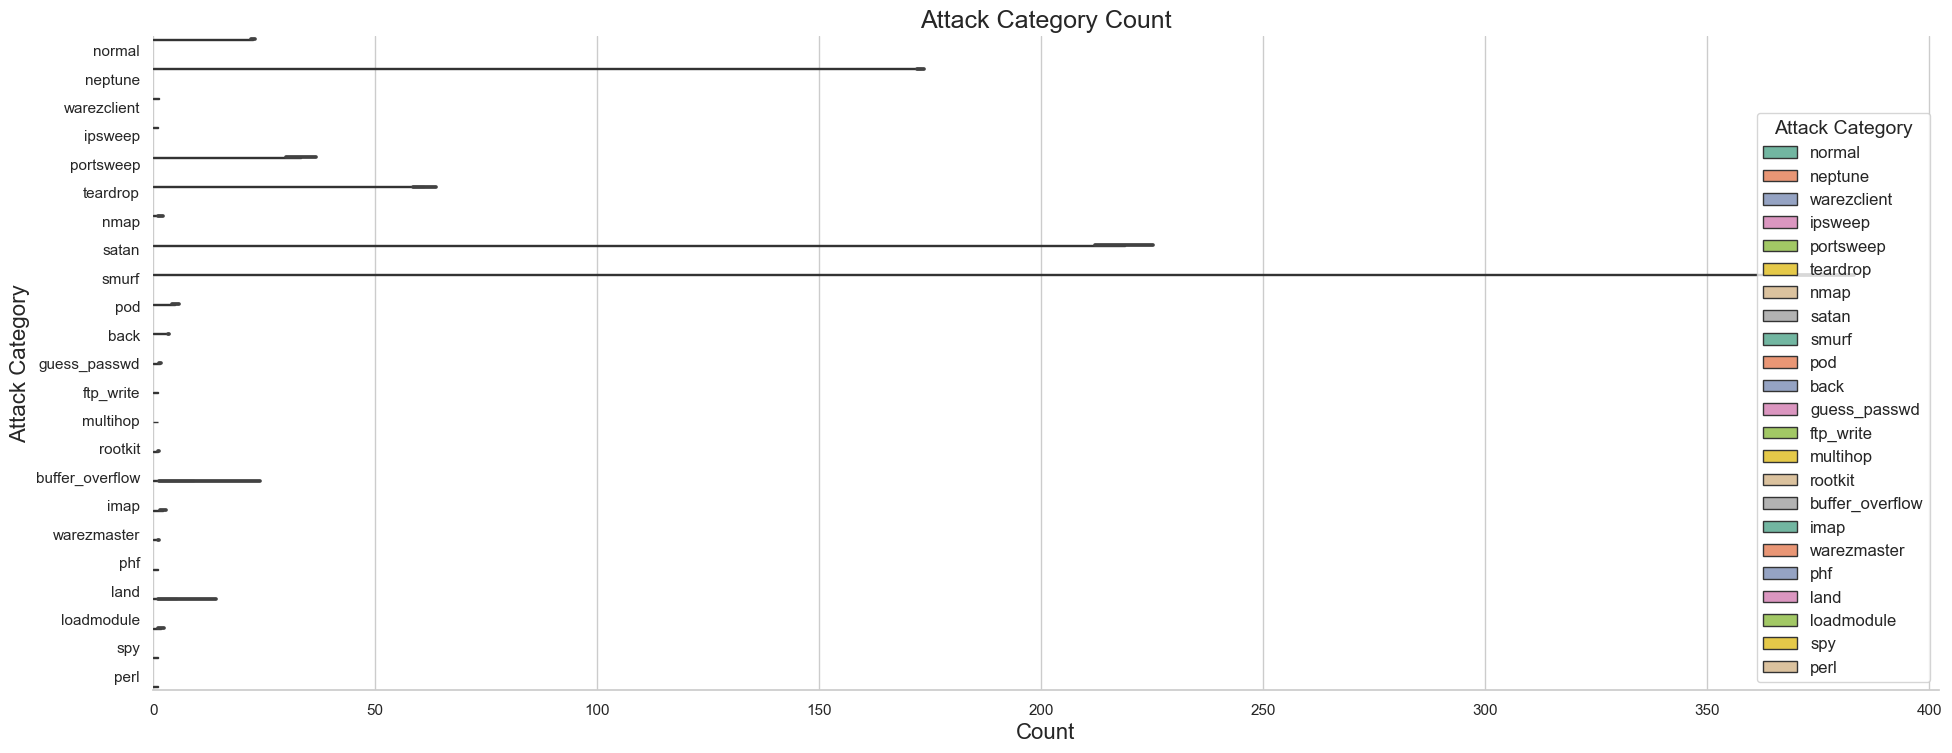

In [228]:
plt.figure(figsize=(20, 8)) # Set the figure size
sns.barplot(data=df, y="attack_category", x="count", hue="attack_category", palette="Set2", 
            edgecolor="0.2") # Create the bar plot with desired parameters
plt.title("Attack Category Count", fontsize=18) # Add a title to the plot
plt.xlabel("Count", fontsize=16) # Add a label to the x-axis
plt.ylabel("Attack Category", fontsize=16) # Add a label to the y-axis
plt.legend(title="Attack Category", fontsize=12, title_fontsize=14, loc="lower right") # Add a legend
sns.despine(left=True) # Remove the left spine
plt.tight_layout(pad=2) # Add extra spacing between the plot and the axes
plt.show() # Display the plot

In [229]:
# By analyzing we come to know that num_outbound_cmds has only zeros therefore removing them
df.drop(['num_outbound_cmds'], axis=1, inplace=True)

array([[<AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'src_bytes'}>,
        <AxesSubplot: title={'center': 'dst_bytes'}>,
        <AxesSubplot: title={'center': 'land'}>,
        <AxesSubplot: title={'center': 'wrong_fragment'}>,
        <AxesSubplot: title={'center': 'urgent'}>],
       [<AxesSubplot: title={'center': 'hot'}>,
        <AxesSubplot: title={'center': 'num_failed_logins'}>,
        <AxesSubplot: title={'center': 'logged_in'}>,
        <AxesSubplot: title={'center': 'num_compromised'}>,
        <AxesSubplot: title={'center': 'root_shell'}>,
        <AxesSubplot: title={'center': 'su_attempted'}>],
       [<AxesSubplot: title={'center': 'num_root'}>,
        <AxesSubplot: title={'center': 'num_file_creations'}>,
        <AxesSubplot: title={'center': 'num_shells'}>,
        <AxesSubplot: title={'center': 'num_access_files'}>,
        <AxesSubplot: title={'center': 'is_host_login'}>,
        <AxesSubplot: title={'center': 'is_guest_log

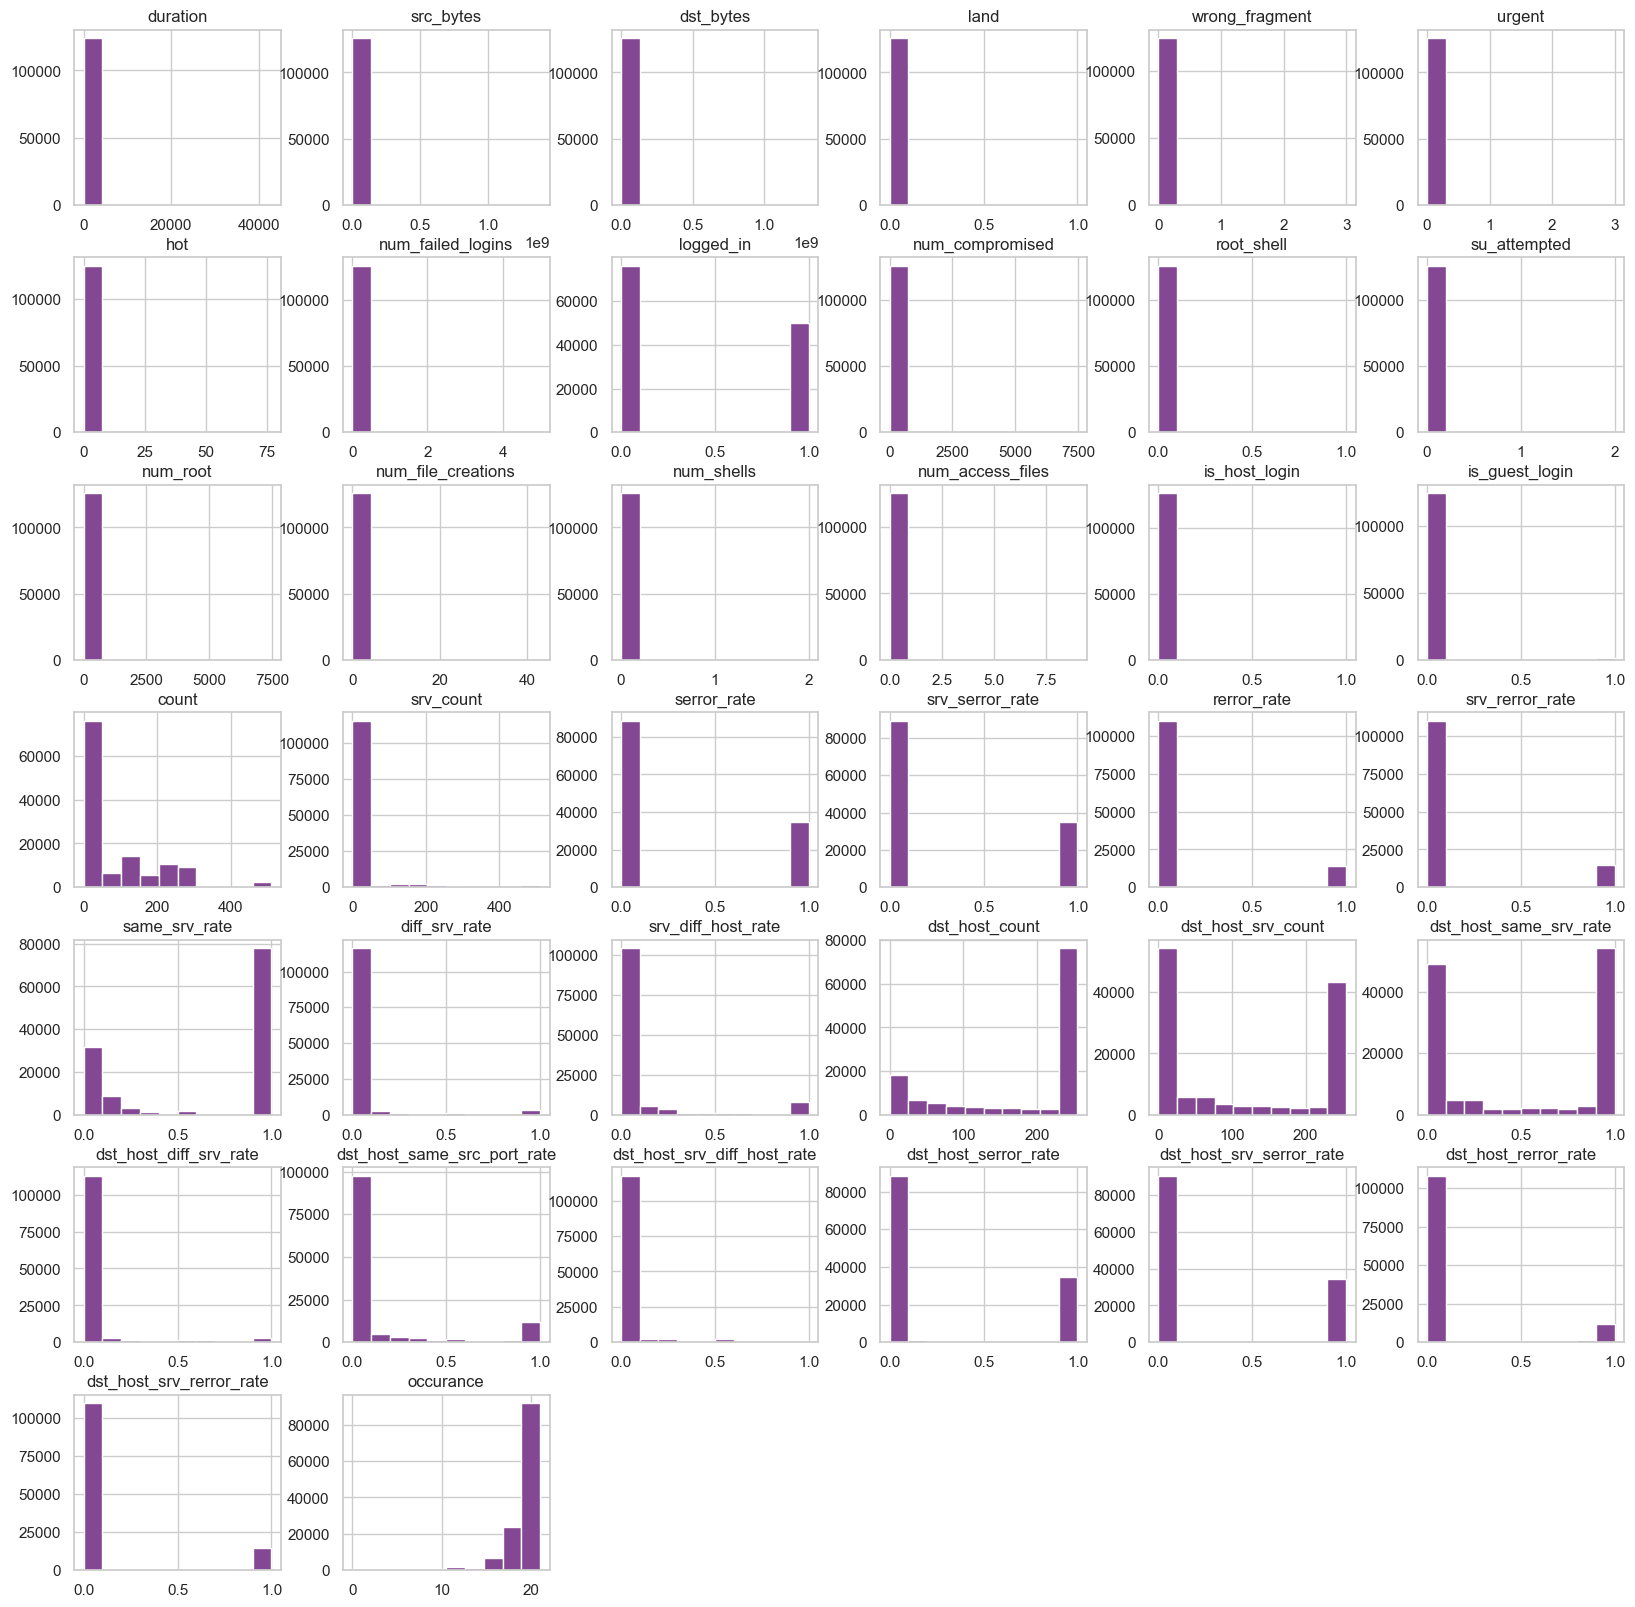

In [230]:
df.hist(figsize= (20, 20))

In [231]:
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.barh(df['attack_category'], df['count'], color='#5F9EA0', edgecolor='0.2')
# ax.set_title('Attack Category Count', fontsize=18)
# ax.set_xlabel('Count', fontsize=16)
# ax.set_ylabel('Attack Category', fontsize=16)
# ax.legend(loc='lower right', fontsize=12, title='Attack Category', title_fontsize=14)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.tick_params(left=False)
# plt.tight_layout(pad=2)
# plt.show()

In [232]:
# Redistribute across common attack class

def modify_attack_categories(df):
    attack_category_dict = {
        'apache2': 'Dos', 'back': 'Dos', 'land': 'Dos', 'neptune': 'Dos', 'mailbomb': 'Dos',
        'pod': 'Dos', 'processtable': 'Dos', 'smurf': 'Dos', 'teardrop': 'Dos', 'udpstorm': 'Dos',
        'worm': 'Dos',
        'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'httptunnel': 'R2L', 'imap': 'R2L',
        'multihop': 'R2L', 'named': 'R2L', 'phf': 'R2L', 'sendmail': 'R2L', 'snmpgetattack': 'R2L',
        'snmpguess': 'R2L', 'spy': 'R2L', 'warezclient': 'R2L', 'warezmaster': 'R2L',
        'xlock': 'R2L', 'xsnoop': 'R2L',
        'ipsweep': 'Probe', 'mscan': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe',
        'saint': 'Probe', 'satan': 'Probe',
        'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'ps': 'U2R',
        'rootkit': 'U2R', 'sqlattack': 'U2R', 'xterm': 'U2R'
    }
    df.attack_category.replace(attack_category_dict, inplace=True)




In [233]:
modify_attack_categories(df)

# Coverting attack_category into 5 Classes

In [234]:
import itertools
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Encode the target columns
# converting categorical data to numerical data
encoded_columns = ['attack_category', 'protocol_type', 'service', 'flag']
for col in encoded_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Print the unique encoded values
for col in encoded_columns:
    print(df[col].unique())

[4 0 2 1 3]
[1 2 0]
[20 44 49 24 51 36 38 14 35 60 18 12 58 67  2 54  7 66 37 65  4 11 19  5
 32 15 21 68 59 26 16 69 28 29 13 30 33 57 34 31 55 63 23 17 43 10 42  6
  8 56  9 53 40 47 41  0 46 48 62 45 50 39 52  1 64 27  3 25 61 22]
[ 9  5  1  4 10  2  6  3  8  7  0]


In [235]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,21


In [236]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
count,125973.00000,125973.000000,125973.000000,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,1.053202,31.226469,6.979996,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,...,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,2.247894,19.504060
std,2604.51531,0.426620,16.346470,2.689365,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,...,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,1.904773,2.291503
min,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,20.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,1.000000,24.000000,9.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,20.000000
75%,0.00000,1.000000,49.000000,9.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,4.000000,21.000000
max,42908.00000,2.000000,69.000000,10.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,21.000000


* Correlation

In [237]:
# Compute the correlation matrix
# Maping   

In [238]:
# Compute the correlation matrix between all the features and the target variable
correlation_matrix = df.corr()

# Select the top 20 correlated features with the target variable
top_corr_features = correlation_matrix.nlargest(20, 'attack_category')['attack_category'].index

# Subset the dataframe with the selected features
sel_fet_df = df[top_corr_features]

print(top_corr_features)


Index(['attack_category', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'logged_in', 'flag', 'occurance',
       'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'hot',
       'num_access_files', 'root_shell', 'num_file_creations', 'su_attempted',
       'num_shells', 'num_failed_logins', 'num_root', 'num_compromised',
       'dst_host_srv_diff_host_rate'],
      dtype='object')


<AxesSubplot: >

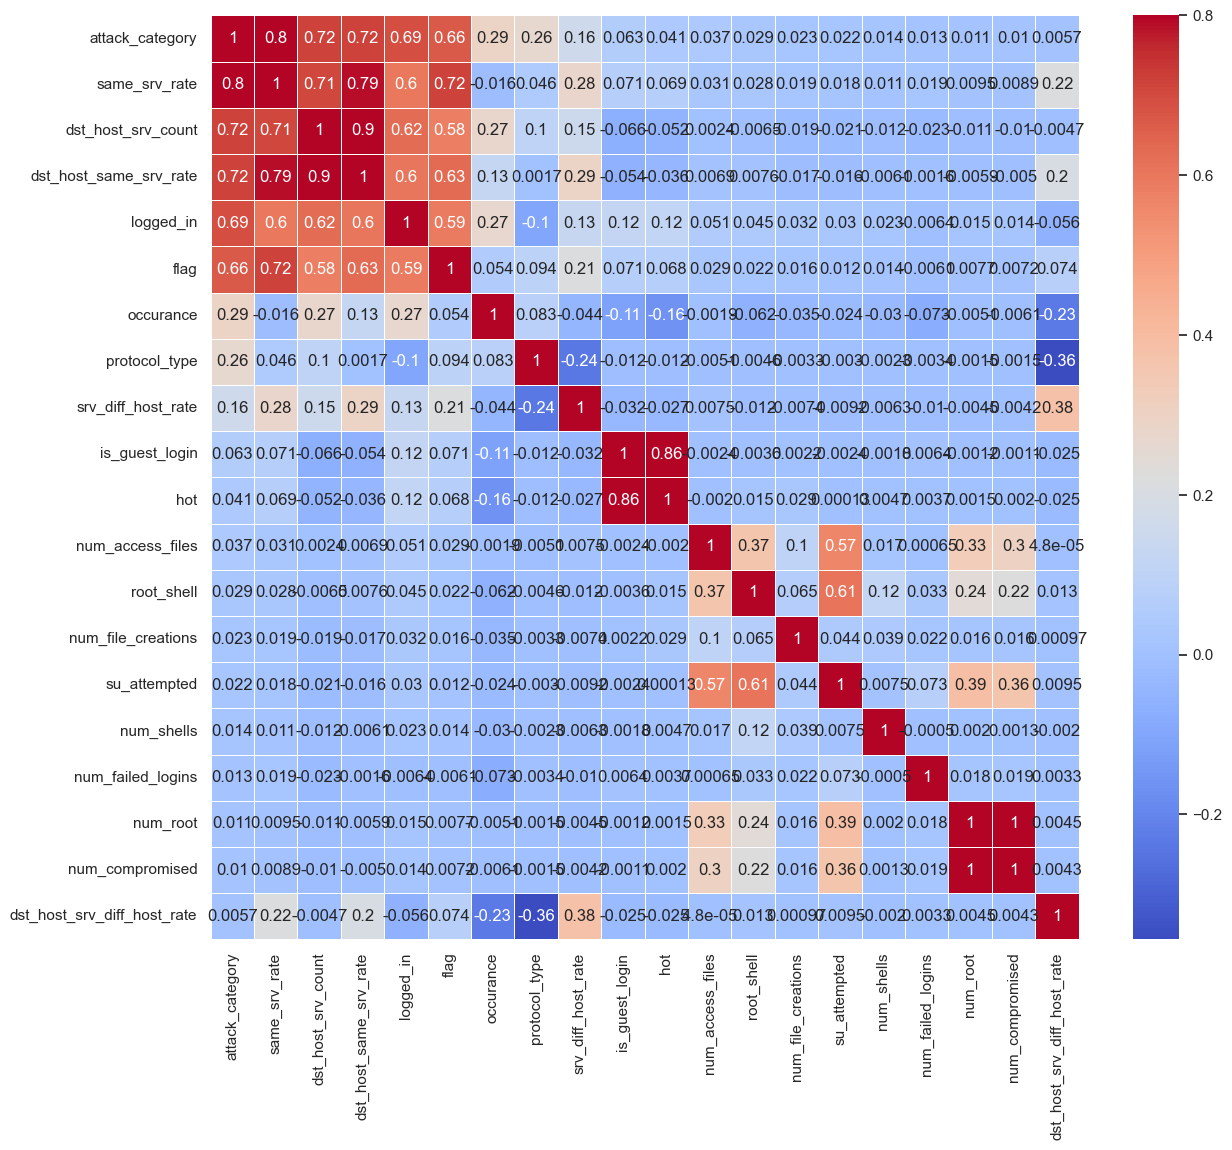

In [239]:
cm =np.corrcoef(df[top_corr_features].values.T)
f , ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm, vmax=0.8, linewidths=0.5, annot=True, cmap='coolwarm',
           linecolor='White', xticklabels=top_corr_features.values, yticklabels= top_corr_features.values)

In [240]:
sel_fet_df.head()

,attack_category,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,occurance,protocol_type,srv_diff_host_rate,is_guest_login,hot,num_access_files,root_shell,num_file_creations,su_attempted,num_shells,num_failed_logins,num_root,num_compromised,dst_host_srv_diff_host_rate
0,4,1.00,25,0.17,0,9,20,1,0.00,0,0,0,0,0,0,0,0,0,0,0.00
1,4,0.08,1,0.00,0,9,15,2,0.00,0,0,0,0,0,0,0,0,0,0,0.00
2,0,0.05,26,0.10,0,5,19,1,0.00,0,0,0,0,0,0,0,0,0,0,0.00
3,4,1.00,255,1.00,1,9,21,1,0.00,0,0,0,0,0,0,0,0,0,0,0.04
4,4,1.00,255,1.00,1,9,21,1,0.09,0,0,0,0,0,0,0,0,0,0,0.00


In [241]:
X_train = sel_fet_df.drop(['attack_category'], axis=1)
Y_train = sel_fet_df['attack_category']

In [242]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   same_srv_rate                125973 non-null  float64
 1   dst_host_srv_count           125973 non-null  int64  
 2   dst_host_same_srv_rate       125973 non-null  float64
 3   logged_in                    125973 non-null  int64  
 4   flag                         125973 non-null  int32  
 5   occurance                    125973 non-null  int64  
 6   protocol_type                125973 non-null  int32  
 7   srv_diff_host_rate           125973 non-null  float64
 8   is_guest_login               125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_access_files             125973 non-null  int64  
 11  root_shell                   125973 non-null  int64  
 12  num_file_creations           125973 non-null  int64  
 13 

In [243]:
#we selected features based on correlation heatmap
# feature we select
slct_feat = ['same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','logged_in','flag','occurance','protocol_type','srv_diff_host_rate','is_guest_login','hot','root_shell','num_failed_logins','num_root','num_compromised','dst_host_srv_diff_host_rate']
X_train = df[slct_feat]
X_train.columns

Index(['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'flag', 'occurance', 'protocol_type', 'srv_diff_host_rate',
       'is_guest_login', 'hot', 'root_shell', 'num_failed_logins', 'num_root',
       'num_compromised', 'dst_host_srv_diff_host_rate'],
      dtype='object')

In [244]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   same_srv_rate                125973 non-null  float64
 1   dst_host_srv_count           125973 non-null  int64  
 2   dst_host_same_srv_rate       125973 non-null  float64
 3   logged_in                    125973 non-null  int64  
 4   flag                         125973 non-null  int32  
 5   occurance                    125973 non-null  int64  
 6   protocol_type                125973 non-null  int32  
 7   srv_diff_host_rate           125973 non-null  float64
 8   is_guest_login               125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  root_shell                   125973 non-null  int64  
 11  num_failed_logins            125973 non-null  int64  
 12  num_root                     125973 non-null  int64  
 13 

In [245]:
X_train.shape

(125973, 15)

In [246]:
Y_train.shape

(125973,)

In [247]:
X_train.head()

,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,occurance,protocol_type,srv_diff_host_rate,is_guest_login,hot,root_shell,num_failed_logins,num_root,num_compromised,dst_host_srv_diff_host_rate
0,1.00,25,0.17,0,9,20,1,0.00,0,0,0,0,0,0,0.00
1,0.08,1,0.00,0,9,15,2,0.00,0,0,0,0,0,0,0.00
2,0.05,26,0.10,0,5,19,1,0.00,0,0,0,0,0,0,0.00
3,1.00,255,1.00,1,9,21,1,0.00,0,0,0,0,0,0,0.04
4,1.00,255,1.00,1,9,21,1,0.09,0,0,0,0,0,0,0.00


In [248]:
Y_train.head()

0    4
1    4
2    0
3    4
4    4
Name: attack_category, dtype: int32

In [249]:
# Feature Scaling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [250]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.30, random_state=42)

array([[<AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'protocol_type'}>,
        <AxesSubplot: title={'center': 'service'}>,
        <AxesSubplot: title={'center': 'flag'}>,
        <AxesSubplot: title={'center': 'src_bytes'}>,
        <AxesSubplot: title={'center': 'dst_bytes'}>],
       [<AxesSubplot: title={'center': 'land'}>,
        <AxesSubplot: title={'center': 'wrong_fragment'}>,
        <AxesSubplot: title={'center': 'urgent'}>,
        <AxesSubplot: title={'center': 'hot'}>,
        <AxesSubplot: title={'center': 'num_failed_logins'}>,
        <AxesSubplot: title={'center': 'logged_in'}>],
       [<AxesSubplot: title={'center': 'num_compromised'}>,
        <AxesSubplot: title={'center': 'root_shell'}>,
        <AxesSubplot: title={'center': 'su_attempted'}>,
        <AxesSubplot: title={'center': 'num_root'}>,
        <AxesSubplot: title={'center': 'num_file_creations'}>,
        <AxesSubplot: title={'center': 'num_shells'}>],
       [<Ax

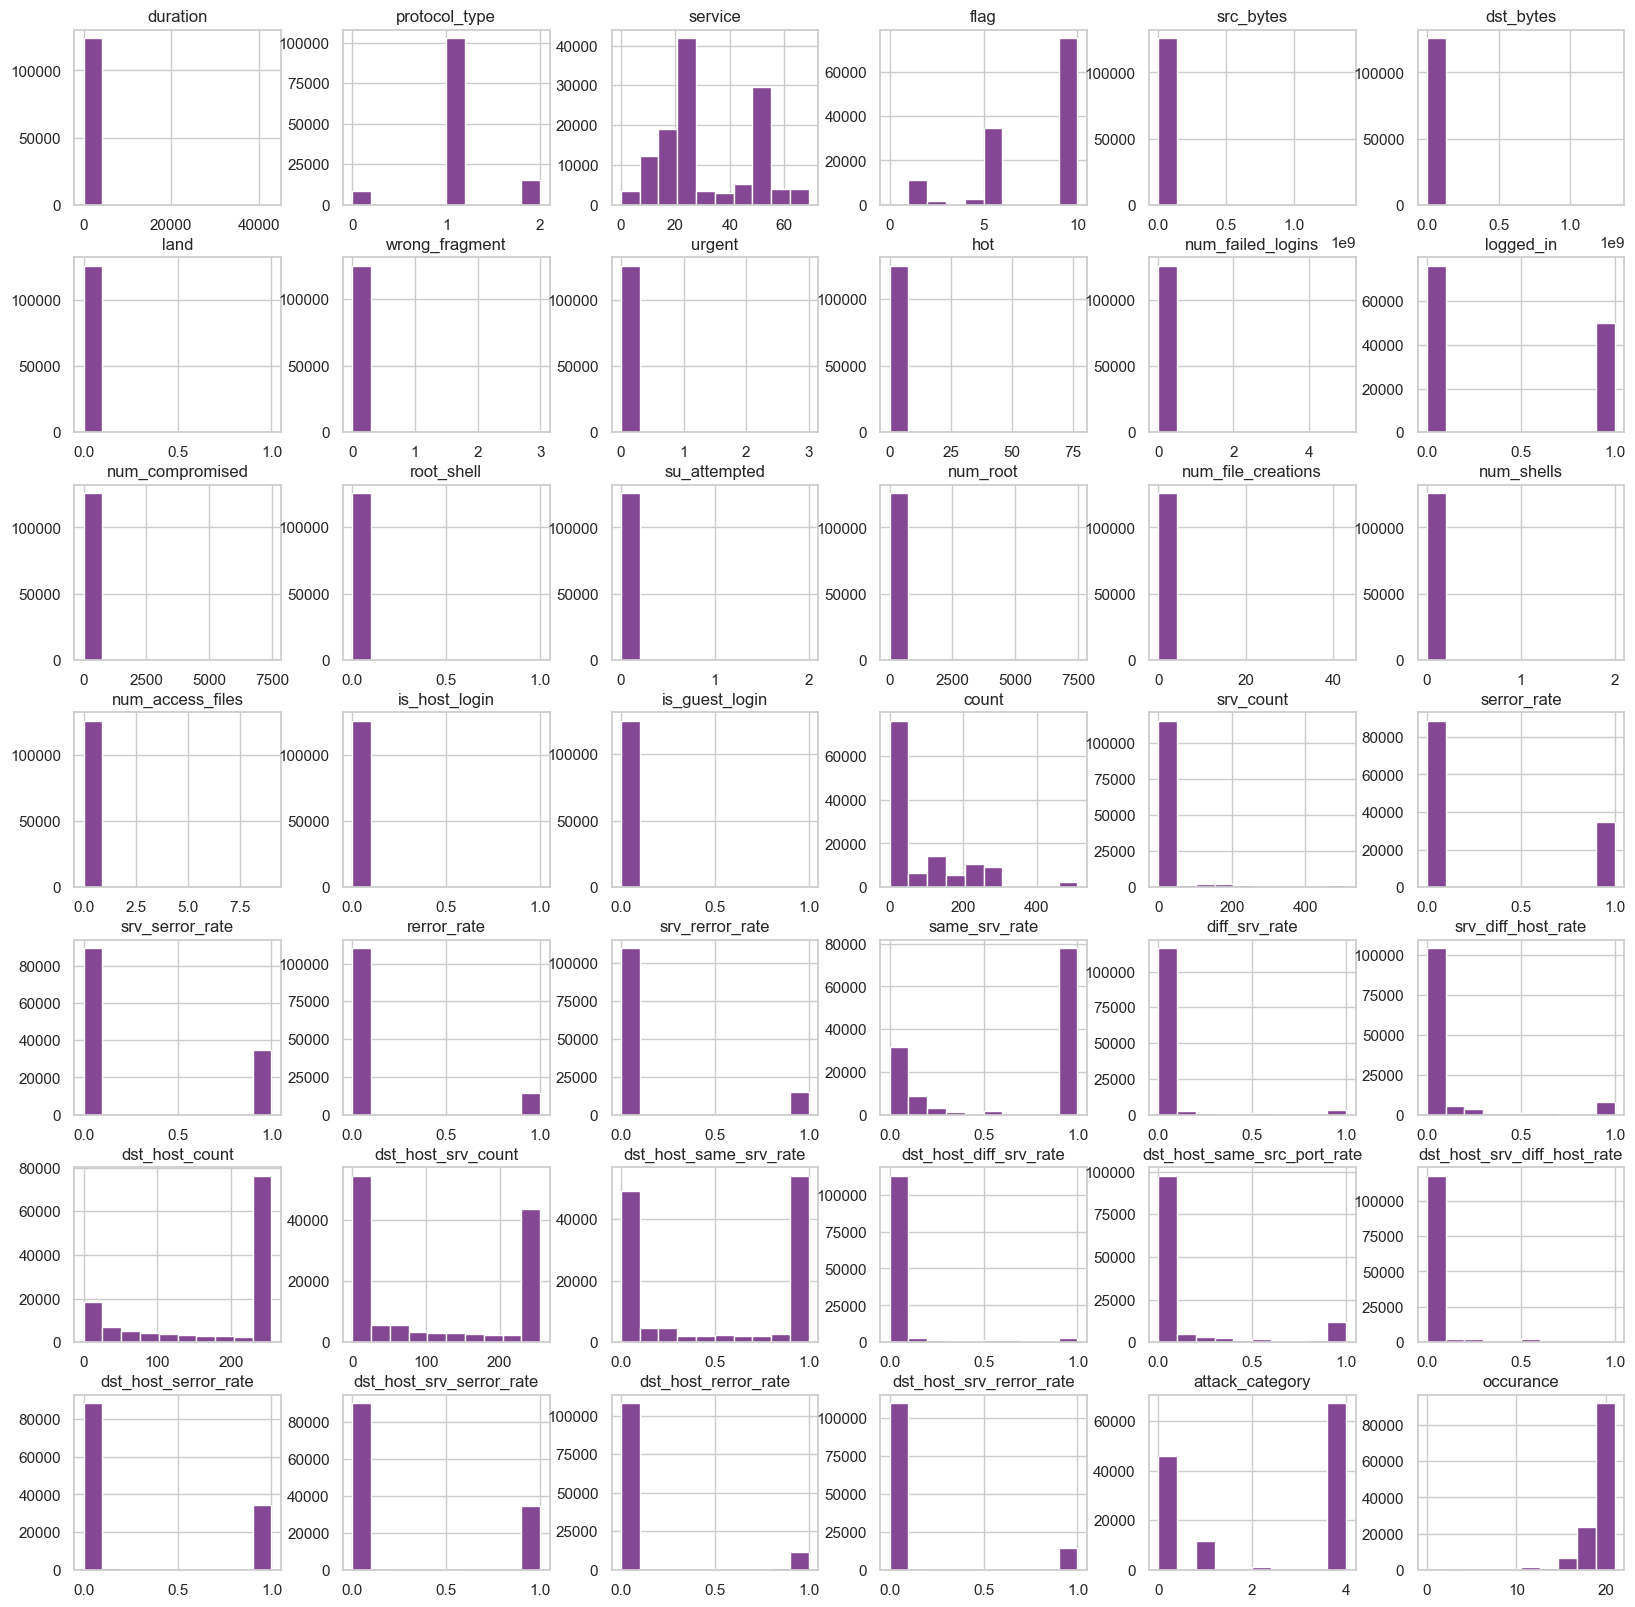

In [252]:
df.hist(figsize= (20, 20))

In [253]:
print('-----X_train------')
print(X_train.shape)
print('-----y_train------')
print(y_train.shape)
print('-----X_test------')
print(X_test.shape)
print('-----y_test------')
print(y_test.shape)

-----X_train------
(88181, 15)
-----y_train------
(88181,)
-----X_test------
(37792, 15)
-----y_test------
(37792,)


### Preprocessing part complted Now passing training data to differnet models 

# Decesion Tree

In [254]:

# Importing the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [255]:
# Creating the feature matrix X and the target vector y
X = df.drop(columns=['attack_category'])
y = df['attack_category']


In [256]:
#  Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiating the Decision Tree Classifier
clf_dt = DecisionTreeClassifier()

# Training the model on the training set
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [257]:
# Predicting the labels of the test set
y_pred = clf_dt.predict(X_test)

In [258]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


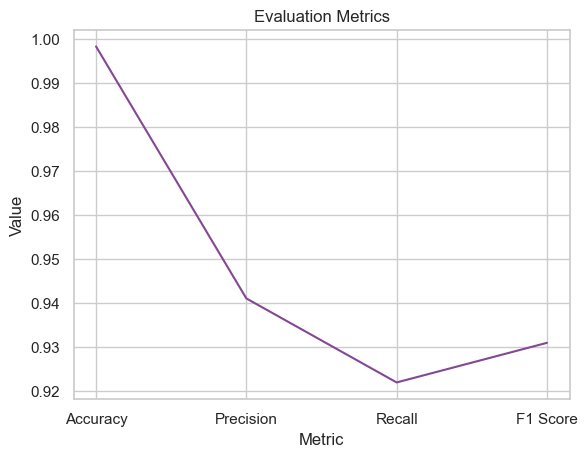

In [259]:

# Create lists for the x-axis and y-axis data
x_values = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
y_values = [accuracy, precision, recall, f1]

# Create line plot
sns.lineplot(x=x_values, y=y_values)

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics')

plt.show()

In [260]:
print("DecisionTree")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

DecisionTree
Accuracy: 0.9982800592718035
Precision: 0.9410598575662323
Recall: 0.9219803642921967
F1 score: 0.9309767385613394


# KNN

In [261]:
# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [262]:
# Assuming X_train and Y_train are already defined
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [263]:
y_pred = knn.predict(X_test)

In [264]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


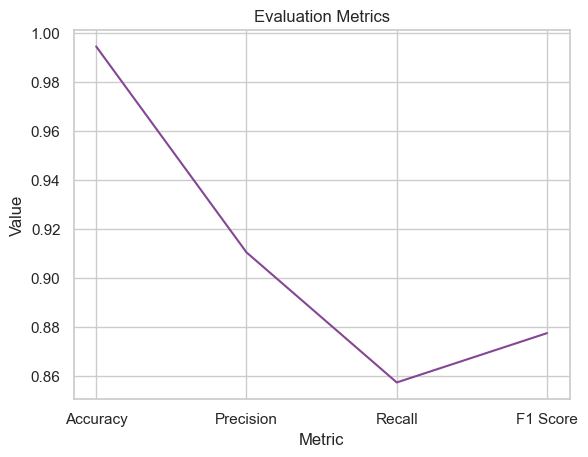

In [265]:
#  Create lists for the x-axis and y-axis data
x_values = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
y_values = [accuracy, precision, recall, f1]

# Create line plot
sns.lineplot(x=x_values, y=y_values)

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics')

plt.show()


In [266]:
print("KNN")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


KNN
Accuracy: 0.9943638865368332
Precision: 0.9103087163065313
Recall: 0.8571965512423502
F1 score: 0.8773335808423341


# ANN

In [267]:
# loading
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [268]:
# Creating MLP classifier object
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, learning_rate_init=0.001, random_state=42, verbose=True)

# Training the model on the preprocessed dataset
mlp.fit(X_train, y_train)

# Predicting the labels of the test set
y_pred = mlp.predict(X_test)

Iteration 1, loss = 2.76074595
Iteration 2, loss = 2.59623296
Iteration 3, loss = 2.12101255
Iteration 4, loss = 1.53693212
Iteration 5, loss = 1.68081968
Iteration 6, loss = 2.51788858
Iteration 7, loss = 1.16534466
Iteration 8, loss = 1.50211611
Iteration 9, loss = 1.86050730
Iteration 10, loss = 2.20964164
Iteration 11, loss = 1.51952279
Iteration 12, loss = 1.83508520
Iteration 13, loss = 1.31807992
Iteration 14, loss = 1.52404286
Iteration 15, loss = 1.26329703
Iteration 16, loss = 1.04103661
Iteration 17, loss = 0.85654095
Iteration 18, loss = 0.85906566
Iteration 19, loss = 1.37759895
Iteration 20, loss = 1.29899314
Iteration 21, loss = 1.09310369
Iteration 22, loss = 1.03038650
Iteration 23, loss = 0.72871679
Iteration 24, loss = 0.91745596
Iteration 25, loss = 0.95120212
Iteration 26, loss = 1.27094595
Iteration 27, loss = 0.79955961
Iteration 28, loss = 0.98620179
Iteration 29, loss = 1.00678073
Iteration 30, loss = 1.23394354
Iteration 31, loss = 1.19004423
Iteration 32, los

In [269]:

# Evaluating the performance of the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


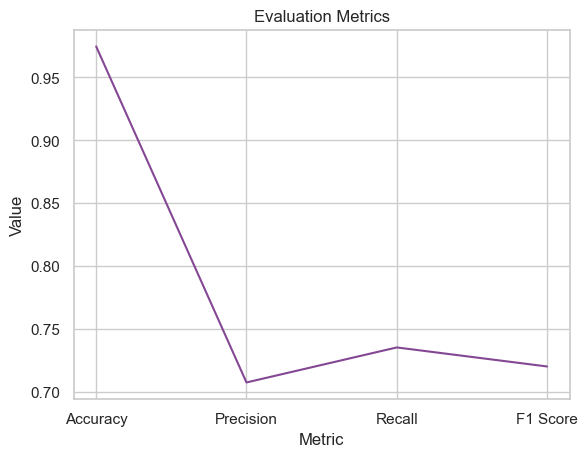

In [270]:
#  Create lists for the x-axis and y-axis data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])


# plt.show()
x_values = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
y_values = [accuracy, precision, recall, f1]

# Create line plot
sns.lineplot(x=x_values, y=y_values)

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics')

plt.show()

In [271]:
print("ANN")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

ANN
Accuracy: 0.9746507197290432
Precision: 0.7075480939270998
Recall: 0.7353810650446446
F1 score: 0.7202484772050198


# Clustering

In [272]:
new_df = df[['src_bytes', 'dst_bytes','srv_count', 'serror_rate', 'srv_serror_rate',
               'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
               'dst_host_count', 'occurance',
               'attack_category']].copy()


In [273]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [274]:
sse = []

In [275]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)    
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

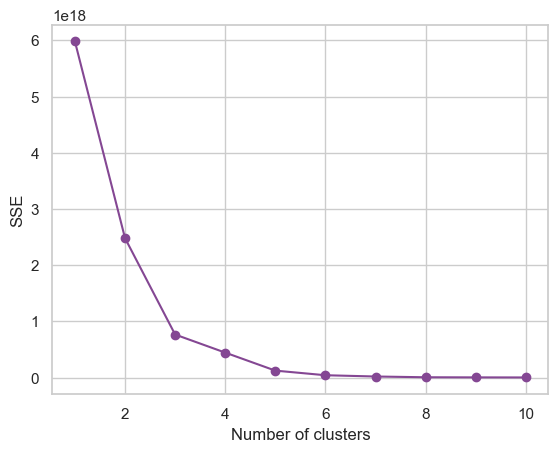

In [276]:
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [277]:
kmeans = KMeans(n_clusters=5, n_init=5, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=5, n_init=5, random_state=42)

In [278]:
plt.show()

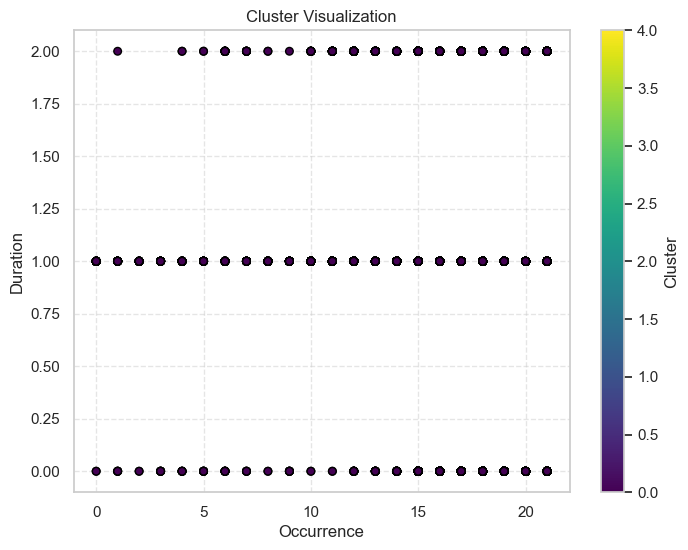

In [282]:


# Visualize the resulting clusters using a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train['occurance'], X_train['protocol_type'], c=kmeans.labels_, cmap='viridis', s=30, edgecolor='black')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Add labels and title
plt.xlabel('Occurrence')
plt.ylabel('Duration')
plt.title('Cluster Visualization')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Customize color palette
cmap = plt.get_cmap('viridis')
scatter.set_cmap(cmap)

# Show the plot
plt.show()